# 1. 原始資料集匯入

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='Microsoft JhengHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",30) #設定pandas最多顯示出30個欄位資訊

df = pd.read_csv('g_lvr_land_a.csv', encoding='utf8') 
df.sample(5)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
66,宜蘭市,房地(土地+建物)+車位,宜蘭縣宜蘭市陽明二路30巷31~60號,84.76,住,NaN,NaN,1071025,土地2建物1車位1,全,四層,透天厝,見其他登記事項,鋼筋混凝土造,940107.0,252.60,4,2,3,有,有,11300000,44735.0,坡道平面,0.0,0,NaN,RPRNMLTLJINFFBG68CA
169,冬山鄉,房地(土地+建物),宜蘭縣冬山鄉鹿埔路726巷1~30號,34.89,NaN,鄉村區,乙種建築用地,1071001,土地2建物1車位0,三層,三層,公寓(5樓含以下無電梯),住家用,見其他登記事項,1070914.0,55.16,2,1,1,有,無,2900000,52574.0,NaN,0.0,0,NaN,RPRPMLNJKINFFAG08CA
155,礁溪鄉,房地(土地+建物),宜蘭縣礁溪鄉德陽路211~240號,16.01,住,NaN,NaN,1071108,土地1建物1車位0,四層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,840601.0,84.27,2,1,1,有,有,4450000,52806.0,NaN,0.0,0,NaN,RPOOMLRKKINFFBG28CA
12,礁溪鄉,房地(土地+建物),宜蘭縣礁溪鄉復興街1~30號,13.05,住,NaN,NaN,1071025,土地1建物1車位0,五層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,740618.0,49.04,2,1,1,有,無,2000000,40783.0,NaN,0.0,0,NaN,RPQOMLQLJINFFBG38CA
29,宜蘭市,房地(土地+建物),宜蘭縣宜蘭市縣政五街121~150號,129.85,住,NaN,NaN,1071019,土地1建物1車位0,全,三層,透天厝,見其他登記事項,鋼筋混凝土造,1031229.0,270.20,4,2,5,有,無,13800000,51073.0,NaN,0.0,0,NaN,RPVOMLQLJINFFBG88CA


# 2. 原始資料集預處理

In [235]:
df.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
鄉鎮市區,,,,,,,,,,,
三星鄉,843.241250,1.071013e+06,1.057176e+06,60.685000,1.250000,0.750000,1.250000,6.242500e+06,25589.875000,0.000000,0.000000
五結鄉,547.524706,1.070373e+06,9.906920e+05,82.880000,1.764706,0.941176,1.764706,9.837504e+06,34822.882353,0.000000,0.000000
冬山鄉,386.185862,1.069638e+06,1.004663e+06,128.024138,2.379310,1.172414,2.000000,9.789913e+06,50279.360000,0.000000,0.000000
員山鄉,311.586250,1.069681e+06,8.705523e+05,43.991250,1.625000,0.750000,1.000000,6.022667e+06,26943.875000,0.000000,0.000000
壯圍鄉,733.216667,1.071023e+06,8.874130e+05,43.280000,0.666667,0.333333,0.583333,1.043630e+07,25226.250000,0.000000,0.000000
大同鄉,4402.500000,1.071108e+06,NaN,0.000000,0.000000,0.000000,0.000000,1.350000e+06,5800.500000,0.000000,0.000000
宜蘭市,131.324286,1.071032e+06,9.131212e+05,138.191714,2.571429,1.428571,2.142857,8.382240e+06,53273.117647,4.539429,94285.714286
礁溪鄉,181.723529,1.069262e+06,9.033912e+05,46.239412,0.764706,0.470588,0.470588,4.703138e+06,52257.941176,0.000000,0.000000
羅東鎮,260.606250,1.071025e+06,7.737378e+05,97.655833,1.875000,1.083333,1.458333,7.040597e+06,45653.666667,0.000000,0.000000


In [271]:
df.groupby('交易標的').mean()

,土地移轉總面積(坪),交易年月日,建築完成年月,建物移轉總面積(坪),建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元(萬),每坪單價,車位移轉總面積(坪),車位總價元,交易年,建築完成年,屋齡
交易標的,,,,,,,,,,,,,,
建物,0.000000,1.071119e+06,190620.000000,198.34740,2.000000,1.00000,1.000000,50.000000,27547.148070,0.00000,0.000000,107.000000,19.000000,89.000000
房地(土地+建物),365.362764,1.070294e+06,919002.024691,403.59100,2.670732,1.45122,2.243902,660.398182,175776.135407,0.00000,0.000000,106.926829,91.827160,16.172840
房地(土地+建物)+車位,112.043395,1.071046e+06,912222.000000,552.37208,3.000000,2.00000,1.923077,679.543015,147232.724055,40.40184,253846.153846,107.000000,91.153846,16.846154


In [272]:
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)
df.head(3)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積(坪),都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,...,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元(萬),每坪單價,車位類別,車位移轉總面積(坪),車位總價元,備註,編號,交易年,建築完成年,屋齡
0,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮純精路三段151~180號,84.595166,住,NaN,NaN,1071016,土地2建物1車位0,一層，地下一層,十三層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,851109.0,...,0,0,0,無,有,1480.0,276337.59768,NaN,0.0,0,NaN,RPWNMLMLJINFFAG38CA,107.0,85.0,23.0
1,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮敬業路1~30號,60.396783,住,NaN,NaN,1071102,土地1建物1車位0,六層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,830324.0,...,3,1,2,有,有,220.0,68948.86203,NaN,0.0,0,二親等買賣關係母子,RPPOMLMLJINFFAG77CA,107.0,83.0,25.0
2,冬山鄉,房地(土地+建物)+車位,宜蘭縣冬山鄉安農三路18巷1~30號,178.446544,NaN,特定農業區,甲種建築用地,1071023,土地1建物1車位1,一層，二層，三層，四層,四層,其他,住家用,鋼筋混凝土造,830927.0,...,3,2,2,有,無,460.0,NaN,坡道平面,0.0,0,"3、4樓重疊,陽台外推",RPSNMLRLJINFFAG48CA,107.0,83.0,25.0


In [273]:
df = df.rename(columns = {'土地移轉總面積平方公尺':'土地移轉總面積(坪)'})
df.loc[:,'土地移轉總面積(坪)'] = df.loc[:,'土地移轉總面積(坪)']*3.30579 #改成以坪為計算單位，方便圖表顯示'
df = df.rename(columns = {'建物移轉總面積平方公尺':'建物移轉總面積(坪)'})
df.loc[:,'建物移轉總面積(坪)'] = df.loc[:,'建物移轉總面積(坪)']*3.30579 #改成以坪為計算單位，方便圖表顯示'
df = df.rename(columns = {'車位移轉總面積平方公尺':'車位移轉總面積(坪)'})
df.loc[:,'車位移轉總面積(坪)'] = df.loc[:,'車位移轉總面積(坪)']*3.30579 #改成以坪為計算單位，方便圖表顯示'
df = df.rename(columns = {'單價每平方公尺':'每坪單價'})
df.loc[:,'每坪單價'] = df.loc[:,'每坪單價']*3.30579 #改成以坪為計算單位，方便圖表顯示'

In [274]:
df.head(3)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積(坪),都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,...,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元(萬),每坪單價,車位類別,車位移轉總面積(坪),車位總價元,備註,編號,交易年,建築完成年,屋齡
0,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮純精路三段151~180號,279.653854,住,NaN,NaN,1071016,土地2建物1車位0,一層，地下一層,十三層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,851109.0,...,0,0,0,無,有,1480.0,913514.067035,NaN,0.0,0,NaN,RPWNMLMLJINFFAG38CA,107.0,85.0,23.0
1,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮敬業路1~30號,199.659082,住,NaN,NaN,1071102,土地1建物1車位0,六層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,830324.0,...,3,1,2,有,有,220.0,227930.458610,NaN,0.0,0,二親等買賣關係母子,RPPOMLMLJINFFAG77CA,107.0,83.0,25.0
2,冬山鄉,房地(土地+建物)+車位,宜蘭縣冬山鄉安農三路18巷1~30號,589.906801,NaN,特定農業區,甲種建築用地,1071023,土地1建物1車位1,一層，二層，三層，四層,四層,其他,住家用,鋼筋混凝土造,830927.0,...,3,2,2,有,無,460.0,NaN,坡道平面,0.0,0,"3、4樓重疊,陽台外推",RPSNMLRLJINFFAG48CA,107.0,83.0,25.0


In [240]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改成以萬為單位，以利後續統計圖表顯示
df = df.rename(columns = {'總價元':'總價元(萬)'})

In [241]:
df.groupby('交易標的').mean()

,土地移轉總面積(坪),交易年月日,建築完成年月,建物移轉總面積(坪),建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元(萬),每坪單價,車位移轉總面積(坪),車位總價元
交易標的,,,,,,,,,,,
建物,0.000000,1.071119e+06,190620.000000,198.347400,2.000000,1.000000,1.000000,50.000000,27547.148070,0.000000,0.000000
房地(土地+建物),434.048450,1.070378e+06,926826.597826,468.395608,2.827957,1.494624,2.494624,812.317928,180237.390931,0.000000,0.000000
房地(土地+建物)+車位,124.054492,1.071045e+06,914213.785714,572.562828,3.071429,2.000000,2.000000,711.718514,147282.861870,37.515994,235714.285714


In [242]:
for i in range(len(df)):   # 執行dataframe所有資料一遍
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)    # 把餘數刪除, 留下年份

In [243]:
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)   # 產生一個屋齡的特徵值 (欄位)

In [244]:
df.head(2)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積(坪),都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,...,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元(萬),每坪單價,車位類別,車位移轉總面積(坪),車位總價元,備註,編號,交易年,建築完成年,屋齡
0,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮純精路三段151~180號,84.595166,住,NaN,NaN,1071016,土地2建物1車位0,一層，地下一層,十三層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,851109.0,...,0,0,0,無,有,1480.0,276337.59768,NaN,0.0,0,NaN,RPWNMLMLJINFFAG38CA,107.0,85.0,23.0
1,羅東鎮,房地(土地+建物),宜蘭縣羅東鎮敬業路1~30號,60.396783,住,NaN,NaN,1071102,土地1建物1車位0,六層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,830324.0,...,3,1,2,有,有,220.0,68948.86203,NaN,0.0,0,二親等買賣關係母子,RPPOMLMLJINFFAG77CA,107.0,83.0,25.0


# 3. 原始資料集探索

In [245]:
df['鄉鎮市區'].count()  # 計算鄉鎮市區筆數

108

Text(0,0.5,'資料筆數')

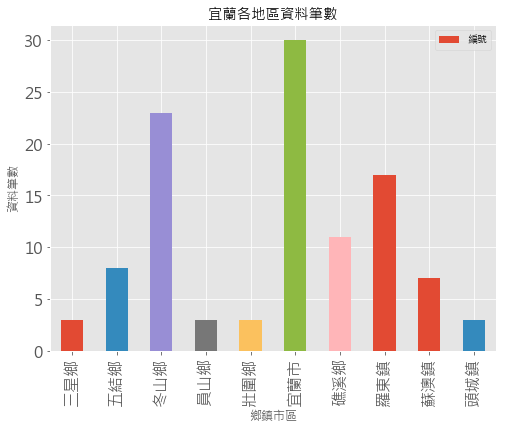

In [246]:
# 圖示各鄉鎮資料筆數
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(8,6),fontsize=16,title='宜蘭各地區資料筆數')
ax.set_ylabel('資料筆數')

In [247]:
# 相關性分析
corr = df[['總價元(萬)','土地移轉總面積(坪)','建物移轉總面積(坪)','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積(坪)','車位總價元','屋齡','建築完成年','交易年']].corr()
corr

,總價元(萬),土地移轉總面積(坪),建物移轉總面積(坪),建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積(坪),車位總價元,屋齡,建築完成年,交易年
總價元(萬),1.000000,0.583267,0.794736,0.250618,0.197892,0.548679,0.095000,0.095000,-0.333859,0.333859,0.055661
土地移轉總面積(坪),0.583267,1.000000,0.340706,-0.049609,-0.125584,0.177086,-0.054350,-0.054350,-0.150523,0.150523,-0.220464
建物移轉總面積(坪),0.794736,0.340706,1.000000,0.494681,0.405295,0.646202,0.128918,0.128918,-0.255887,0.255887,0.056906
建物現況格局-房,0.250618,-0.049609,0.494681,1.000000,0.739446,0.749488,0.017026,0.017026,-0.153167,0.153167,0.172948
建物現況格局-廳,0.197892,-0.125584,0.405295,0.739446,1.000000,0.553717,0.097086,0.097086,-0.063651,0.063651,0.157791
建物現況格局-衛,0.548679,0.177086,0.646202,0.749488,0.553717,1.000000,-0.045902,-0.045902,-0.327264,0.327264,0.096985
車位移轉總面積(坪),0.095000,-0.054350,0.128918,0.017026,0.097086,-0.045902,1.000000,1.000000,-0.144245,0.144245,0.023218
車位總價元,0.095000,-0.054350,0.128918,0.017026,0.097086,-0.045902,1.000000,1.000000,-0.144245,0.144245,0.023218
屋齡,-0.333859,-0.150523,-0.255887,-0.153167,-0.063651,-0.327264,-0.144245,-0.144245,1.000000,-1.000000,0.125443
建築完成年,0.333859,0.150523,0.255887,0.153167,0.063651,0.327264,0.144245,0.144245,-1.000000,1.000000,-0.125443


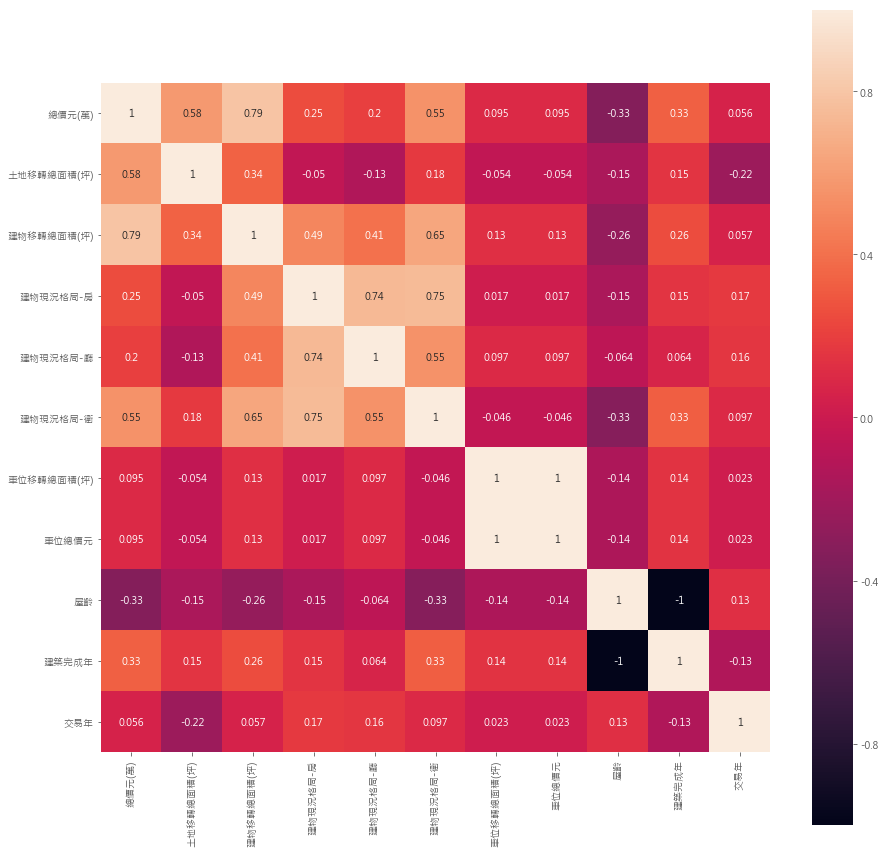

In [275]:
# 相關分析圖, 特別注意哪一個特微值(x)與總價元(y)有較高的相關性, 另外, 若features之間存在高度相關(共線性), 也不用全部選取
import seaborn as sns
plt.rcParams['font.family']='Microsoft JhengHei' #顯示中文
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True)
plt.show()

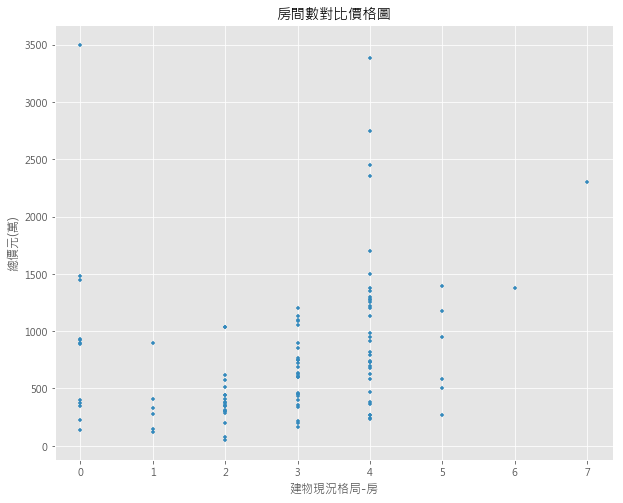

In [249]:
df.plot(kind='scatter',title='房間數對比價格圖',figsize=(10,8),x='建物現況格局-房',y='總價元(萬)',marker='+')

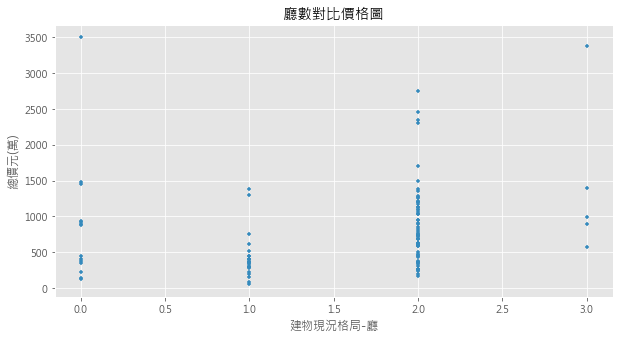

In [250]:
df.plot(kind='scatter',title='廳數對比價格圖',figsize=(10,5),x='建物現況格局-廳',y='總價元(萬)',marker='+')

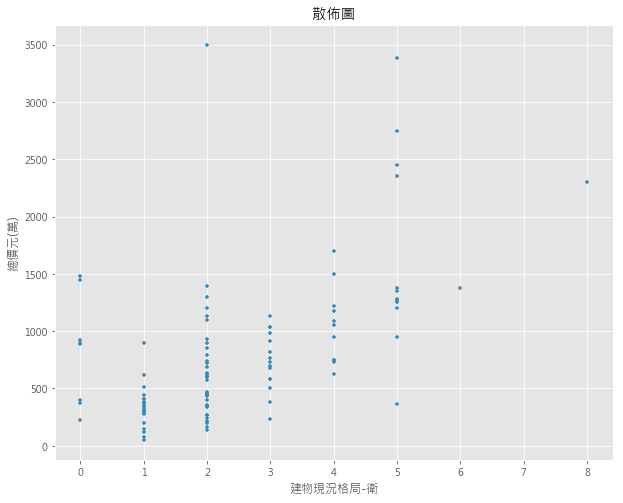

In [251]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,8),x='建物現況格局-衛',y='總價元(萬)',marker='+')

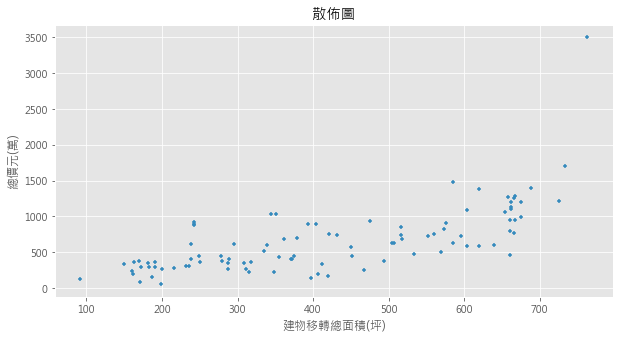

In [252]:
df = df[df['建物移轉總面積(坪)']<800]
df.plot(kind='scatter',title='散佈圖',figsize=(10,5),x='建物移轉總面積(坪)',y='總價元(萬)',marker='+')

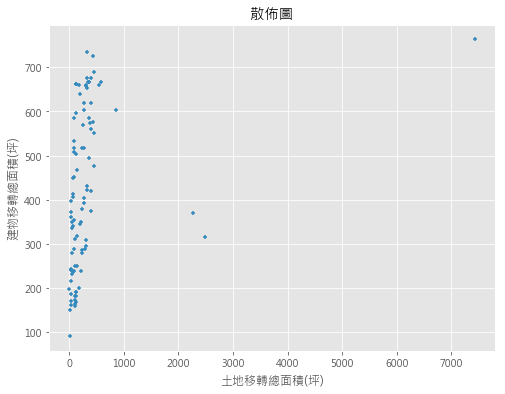

In [253]:
# 土地移轉總面積大致上是以200坪來做區分,並呈現正相關.
df.plot(kind='scatter',title='散佈圖',figsize=(8,6),x='土地移轉總面積(坪)',y='建物移轉總面積(坪)',marker='+')

In [254]:
# 各鄉鎮比較¶
df2 = df[['鄉鎮市區','土地移轉總面積(坪)','建物移轉總面積(坪)','每坪單價','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','屋齡','建築完成年','交易年','總價元(萬)']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積(坪),建物移轉總面積(坪),每坪單價,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡,建築完成年,交易年,總價元(萬)
鄉鎮市區,,,,,,,,,,
三星鄉,404.816024,534.964976,158177.643780,3.333333,2.000000,3.333333,2.333333,105.666667,107.000000,740.000000
五結鄉,315.529391,582.215735,168227.934086,3.750000,2.000000,3.750000,9.000000,99.000000,106.875000,929.625000
冬山鄉,452.851908,331.322803,189933.147284,2.312500,1.250000,1.500000,8.875000,99.125000,106.750000,451.800000
員山鄉,248.837833,387.802225,132742.895520,4.333333,2.000000,2.666667,21.000000,87.000000,107.000000,488.333333
壯圍鄉,541.543499,572.298365,127465.752750,2.666667,1.333333,2.333333,19.333333,88.666667,107.000000,681.268700
宜蘭市,465.133224,497.553229,162187.397522,2.888889,1.629630,2.296296,17.769231,90.230769,107.000000,804.372563
礁溪鄉,40.345664,236.234759,212221.800630,1.181818,0.727273,0.727273,17.727273,90.272727,107.000000,464.141136
羅東鎮,173.097776,398.266152,168848.072742,2.733333,1.600000,2.066667,30.600000,77.400000,107.000000,693.418947
蘇澳鎮,236.255366,415.481132,118516.349546,3.285714,1.714286,3.142857,17.000000,91.000000,107.000000,453.285714


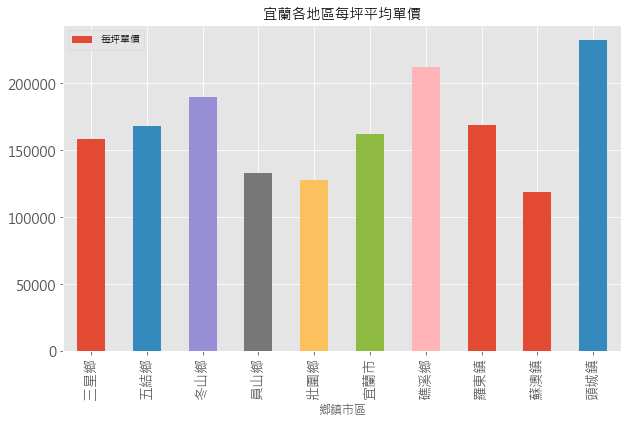

In [255]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='每坪單價',figsize=(10,6),fontsize=14,title='宜蘭各地區每坪平均單價')

# 4. 簡單線性回歸 

### 4.1 # 使用Scikit-Learn SGDRegressor (隨機梯度下降, 可調整步數及學習速度)¶  - 切分成訓練資料及測試資料 

In [256]:

from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積(坪)']]
y = df_ml[['總價元(萬)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% 測試資料, 70% 訓練資料
X_train.head(10)

,建物移轉總面積(坪)
41,559.670247
84,182.347376
28,186.909367
35,468.066806
0,585.290120
79,295.008700
68,585.819046
14,279.008676
53,619.042235
87,91.636499


In [257]:
X.count()   # 資料集總筆數

建物移轉總面積(坪)    90
dtype: int64

In [258]:
# 特徵標準化(Standardization)¶
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   # initial
sc.fit(X_train)   # fit
X_train_normalized = sc.transform(X_train)   # 可得到標準化的訓練資料集
X_test_normalized = sc.transform(X_test)      # 可得到標準化的測試資料集

各變項參數: [289.10467969]
MSE: 69943.00
R Square: 0.302


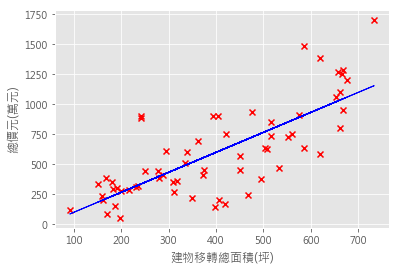

In [259]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣, 使用.raval()來轉換
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# linear regression 物件
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.001)  # 步數100, 學習速度為常數0.001 (可調整)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))   # 求算出測試資料集的MSE
print("R Square: %.3f" % sgdr.score(X_test_normalized,y_test))     # 求算出測試資料集的R Square

plt.scatter(X_train, y_train_1d,  color='red', marker = 'x')   # 訓練資料集的散佈圖

plt.plot(X_train, sgdr.predict(X_train_normalized), color='blue', linewidth=1)   # fit出來的迴歸直線

plt.ylabel('總價元(萬元)')
plt.xlabel('建物移轉總面積(坪)')

plt.show()

## 5. 多變項線性迴歸 (使用2個features)

In [260]:
X = df_ml[['建物移轉總面積(坪)','建物現況格局-房']]
y = df_ml[['總價元(萬)']]

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積(坪),建物現況格局-房
46,516.132993,3
53,619.042235,5
31,371.934433,2
61,516.992498,4
47,354.545977,3


In [262]:
X = df_ml[['建物移轉總面積(坪)','土地移轉總面積(坪)']]
y = df_ml[['總價元(萬)']]

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積(坪),土地移轉總面積(坪)
50,150.413445,24.528962
52,393.455126,272.892965
9,339.504633,68.297621
84,182.347376,115.339013
2,412.298129,75.107549


In [264]:
# 特徵標準化 (Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

In [265]:
# 使用Scikit-Learn LinearRegression
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square: %.3f" % regr.score(X_test_normalized, y_test))

各變項參數: [[248.64916201 -12.01374601]]
MSE: 73914.49
R Square: 0.537


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

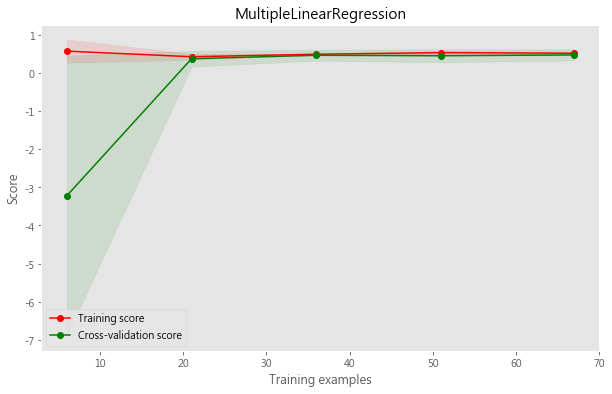

In [266]:
#cv = ShuffleSplit(n_splits=10, random_state=None, test_size=0.3)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "MultipleLinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

In [267]:
# 使用Scikit-Learn SGDRegressor 
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# SGD Regressor 
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square: %.3f" % sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [246.94961405 -12.47092847]
MSE: 74324.58
R Square: 0.534


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

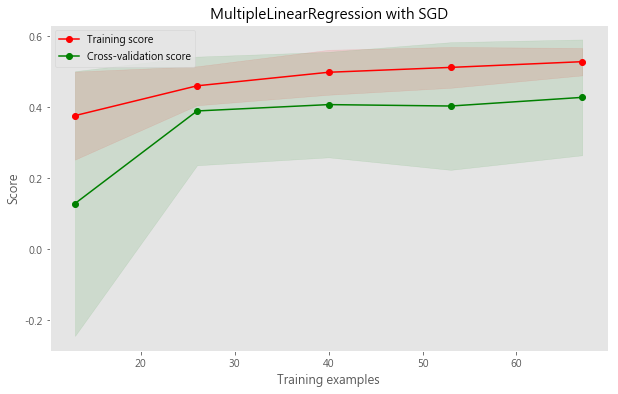

In [268]:
from sklearn.model_selection import ShuffleSplit
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 6. 多項式(Polynomial) 非線性迴歸

In [269]:
from sklearn.model_selection import train_test_split
X = df_ml[['建物移轉總面積(坪)']]
y = df_ml[['總價元(萬)']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積(坪)
17,235.768943
40,675.141492
15,242.678044
18,286.843398
75,575.273576


各變項參數: 
 [[ 0.         -0.06597155  0.0019568 ]]
MSE: 45846.03
R Square: 0.621


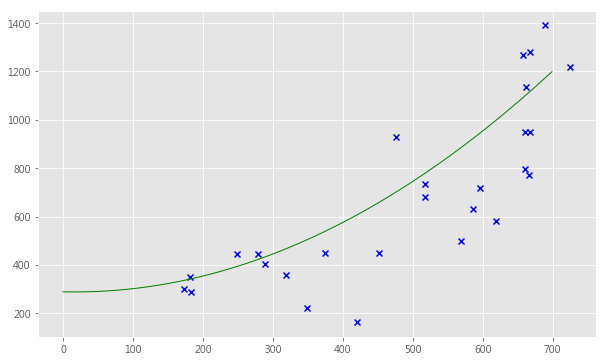

In [270]:
# 創造高次方變項
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square: %.3f" % regr.score(X_test_poly, y_test))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test_raw, y_test,  color='blue', marker = 'x')

X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)


plt.show()